In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import seaborn as sns
from commonfunc.funcs import extract_features, impute_data,show_metrics

Not needed feature: NOx, 'WS (m/s), 'NO2 (µg/m³), 'NO (µg/m³)', 'MP-Xylene (µg/m³)' <br>
Necessary: Ozone, PM10, 'CO (mg/m³), 'AT (°C)', 'Benzene (µg/m³)', Eth-Benzene (µg/m³), Xylene (µg/m³), Toluene (µg/m³), SO2 (µg/m³) , NH3 (µg/m³)<br>
Optional: 'RH (%)', 'SR (W/mt2)'

In [65]:
features = ['PM2.5 (µg/m³)','PM10 (µg/m³)', 'Timestamp', 'Ozone (µg/m³)', 'CO (mg/m³)','AT (°C)', 'Benzene (µg/m³)', 'RH (%)','SR (W/mt2)','NH3 (µg/m³)']

df = extract_features(features=features, path='combined_data20to22.csv')
df = df.set_index('Timestamp')
df = impute_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26304 entries, 2020-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PM2.5 (µg/m³)    26304 non-null  float64
 1   PM10 (µg/m³)     26304 non-null  float64
 2   Ozone (µg/m³)    26304 non-null  float64
 3   CO (mg/m³)       26304 non-null  float64
 4   AT (°C)          26304 non-null  float64
 5   Benzene (µg/m³)  26304 non-null  float64
 6   RH (%)           26304 non-null  float64
 7   SR (W/mt2)       26304 non-null  float64
 8   NH3 (µg/m³)      26304 non-null  float64
dtypes: float64(9)
memory usage: 2.0+ MB


RMSE: 29.550652684614164
R2 score: 0.8787373561776691


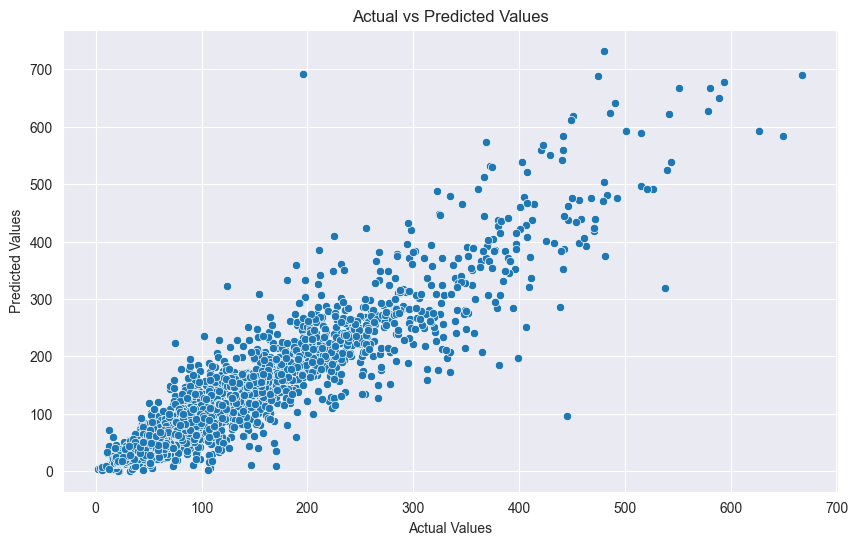

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['PM2.5 (µg/m³)']).fillna(0)  # Features
y = df['PM2.5 (µg/m³)'].fillna(0)  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
show_metrics(y_test, y_pred)
